In [1]:
import copy
from itertools import product
import itertools
from classification_refined import classify
from processing import *
from readfiles import *
from decision import filter_summary
from subgraphclass import make_solver_summary
from sklearn.model_selection import train_test_split
from classification_refined import *
import networkx as nx
from readfiles import *
from metrics import *
import numpy as np
import networkx as nx
import time 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from readfiles import corresp_label_file
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import concurrent.futures
import time
from functools import partial
import os

In [2]:

def make_plot(node_names, target):
    cm = plt.cm.get_cmap('cool')
    fig, ax = plt.subplots(len(node_names.keys()), figsize=(60,60))
    for max_num_nodes, i in zip(node_names.keys(), range(len(node_names.keys()))):
        counts, bins, patches = ax[i].hist(node_names[max_num_nodes], 
                                           bins=len(pd.Series(node_names[max_num_nodes]).unique()))
        
        for c, p in zip(counts, patches):
            plt.setp(p, 'facecolor', cm(c/5))
    # Set the ticks to be at the edges of the bins.
        ax[i].set_title(f'{target} {max_num_nodes} nodes')
        ax[i].tick_params(labelrotation=55)
        ax[i].set_xticks(range(len(pd.Series(node_names[max_num_nodes]).unique())))
    plt.tight_layout()
    plt.savefig(f'outputs/{target}')
    #plt.show()

In [3]:
def find_node_indices(node_names): 
    original_node_indices = []
    original_node_nums = {v:k for k,v in corresp_label_file('fs_default.txt').items()}
    for node in node_names:
        original_node_indices.append(original_node_nums[node] -1)
        # now 0 corresponds to node 0
    mat = np.triu_indices(84)

    edge_indices = set()
    for u, v, i in zip(mat[0], mat[1], range(len(mat[0]))):
        for u1, v1 in itertools.product(original_node_indices, repeat = 2):
            if (u,v) == (u1, v1) or (v,u) == (u1,v1):
                edge_indices.add(i)
    print(edge_indices)
    return list(edge_indices)


In [4]:
num = 84  # number of nodes in the graph
tri = int(num * (num + 1) * 0.5)  # we want only the upper diagonal due to symettry of connections
mat = np.triu_indices(84)
mews = '/home/skapoor/Thesis/gmwcs-solver'

In [5]:
num_nodes = [7,10,12,15,20]

In [6]:
feature, edge, solver_node_wts = 'num_streamlines', 'fscores','const'
val, thresh = -0.01, 0
choice, classifier, refit_metric, feature_selection = 'random', 'none', 'balanced_accuracy', 'baseline'
baseline_cases, self_loops = set(), False

In [7]:

'''labels = ['ReadEng_Unadj', 'ReadEng_AgeAdj',  'PicVocab_Unadj', 
          'PicVocab_AgeAdj','ProcSpeed_Unadj', 'ProcSpeed_AgeAdj', 
          'PicSeq_Unadj','PicSeq_AgeAdj', 'CardSort_Unadj', 'CardSort_AgeAdj',
'Flanker_Unadj','Flanker_AgeAdj', 'PMAT24_A_CR', 'VSPLOT_TC', 'IWRD_TOT',  'ER40_CR']'''
labels = ['NEOFAC_O']

NEOFAC_O
StratifiedKFold(n_splits=5, random_state=22, shuffle=True) ----------------------------------------------------------------------------------------------------
Number of nodes 7
Time for fold 1: 0.708
{2946, 2966, 795, 797, 167, 811, 942, 175, 177, 956, 191, 3135, 834, 1859, 3525, 840, 979, 3155, 214, 985, 1882, 860, 220, 1888, 1005, 240, 1908, 2940}
Best estimator {'C': 86.8081494019555, 'class_weight': 'balanced', 'gamma': 0.00011114524287405247, 'kernel': 'rbf'}
Best estimator {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}
Best estimator {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 100, 50), 'alpha': 0.001, 'activation': 'tanh'}
Time for fold 2: 0.712
{2442, 2444, 1679, 2576, 3215, 1554, 1556, 1693, 2462, 1695, 2465, 1570, 1572, 1713, 1716, 2485, 1590, 1593, 3270, 1736, 1613, 3290, 2535, 3560, 3192, 2553, 3195, 2556}
Best estimator {'C': 0.0050789111988495264, 'class_weight': 'bal

Best estimator {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 100, 50), 'alpha': 0.001, 'activation': 'tanh'}
Time for fold 3: 0.691
{567, 569, 572, 586, 84, 90, 92, 95, 609, 611, 109, 622, 625, 626, 637, 642, 132, 134, 145, 148, 149, 160, 165, 720, 723, 737, 3317, 3320, 760, 3321, 762, 3332, 773, 776, 777, 3337, 788, 793, 3380, 3381, 3392, 1859, 3397, 3399, 3410, 3415, 1882, 1884, 1895, 1898, 1899, 1910, 1915, 2940, 2942, 2953, 2956, 2957, 2968, 2973, 942, 956, 3009, 3020, 3023, 3024, 979, 981, 3542, 3547, 3035, 992, 3040, 995, 996, 1007, 3567, 1012}
Best estimator {'C': 0.036175345412181, 'class_weight': None, 'gamma': 0.00032096647431455953, 'kernel': 'linear'}
Best estimator {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best estimator {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.05, 'activation': 'tanh'}
Time for fold 4: 0.712
{3074, 3081,

Best estimator {'C': 2.129373225373731, 'class_weight': None, 'gamma': 0.0037200514572338812, 'kernel': 'sigmoid'}
Best estimator {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
Best estimator {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 100, 50), 'alpha': 0.05, 'activation': 'tanh'}
Time for fold 2: 0.695
{2566, 2568, 2569, 2576, 1554, 1556, 1557, 1560, 1565, 1567, 3105, 1570, 1572, 3108, 3111, 1577, 3113, 1583, 1584, 3121, 1587, 3123, 3124, 1590, 1593, 1595, 3131, 1603, 1605, 1606, 1613, 84, 104, 106, 107, 110, 115, 117, 120, 3192, 122, 3195, 3197, 127, 133, 134, 3205, 3207, 137, 3208, 140, 143, 1679, 145, 1680, 1683, 2192, 2194, 2197, 2199, 1688, 153, 1690, 155, 156, 1693, 2204, 1695, 2210, 163, 1700, 2211, 2214, 3493, 2217, 1706, 1707, 2220, 1710, 2222, 1713, 1716, 1718, 2230, 2232, 2233, 1726, 2750, 1728, 1729, 2240, 2756, 2757, 3270, 1736, 2760, 3272, 2763, 1740, 2766, 1743, 2768, 3280

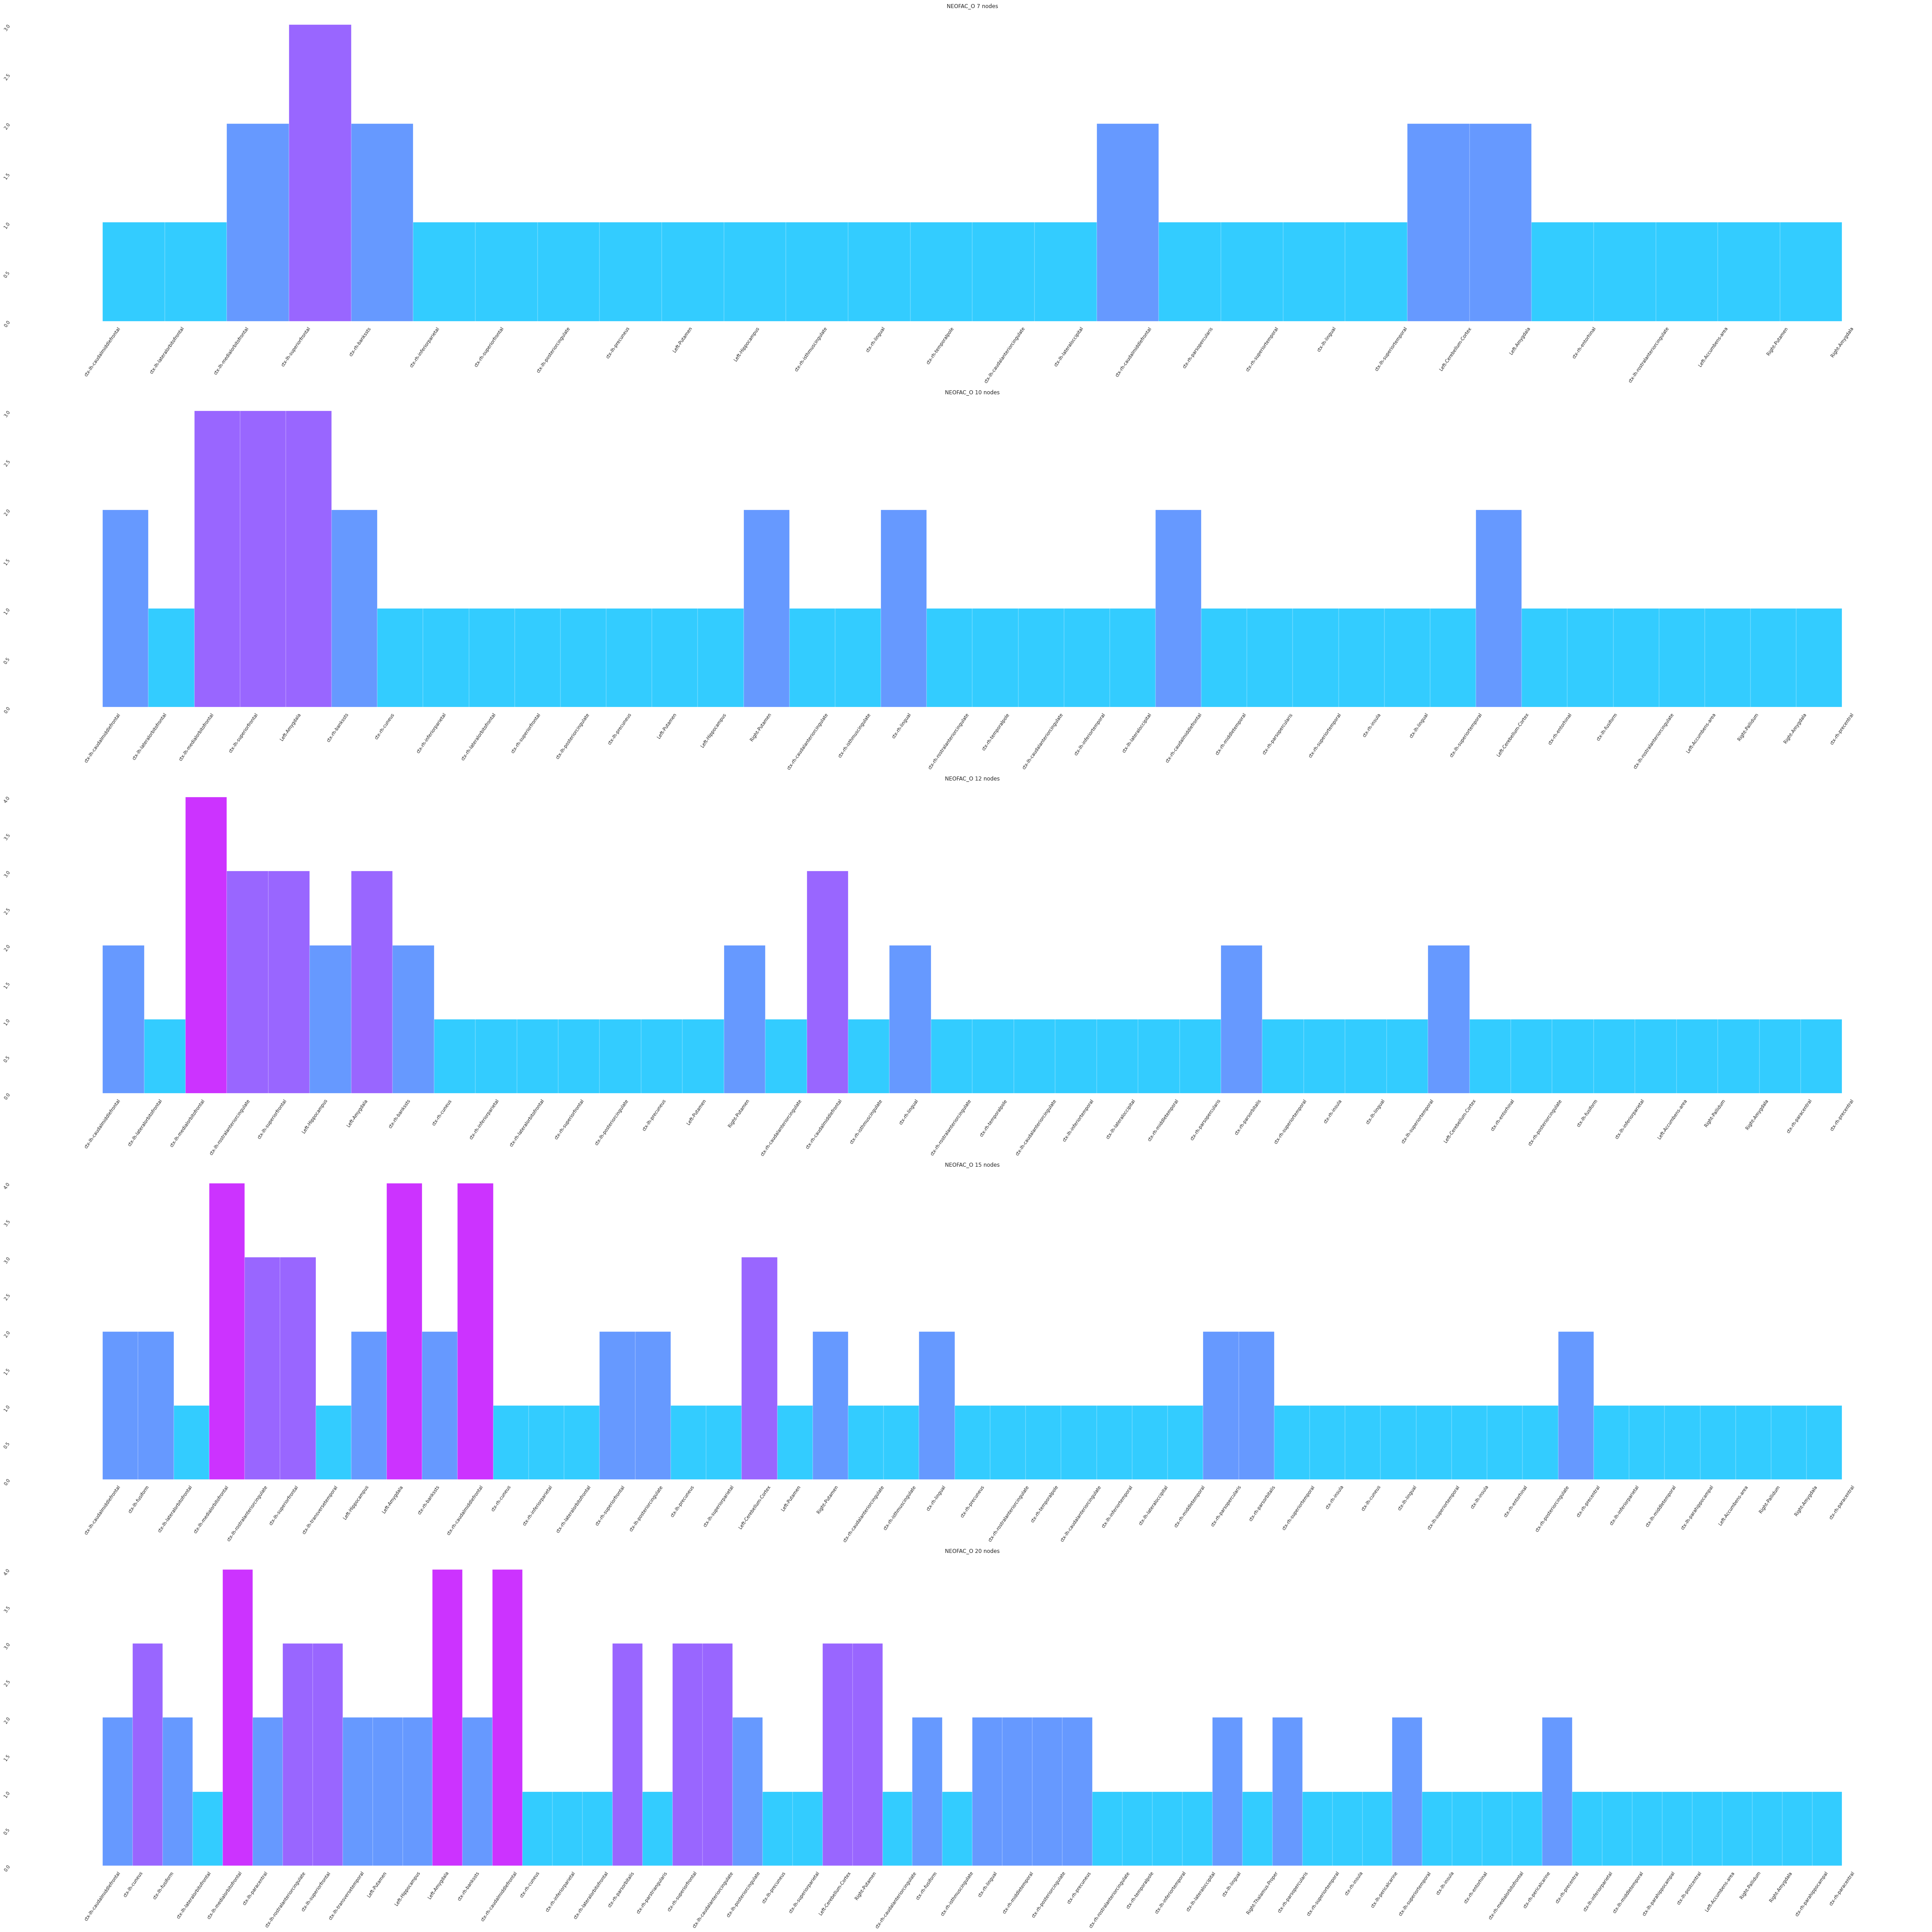

In [8]:
# note: right now the matrix whole is not scaled, for computing the fscores and correlation coeff it has to be so.
y_tr, y_te = computed_subjects(), test_subjects()

labels = [label for label in labels if label in y_tr.columns ]

X_tr = generate_combined_matrix(tri, list(y_tr.index))  # need to check indices till here then convert to numpy array
X_te = generate_test_data(tri, y_te.index)
X_tr, X_te = edge_filtering(feature, X_tr, X_te)
X = X_tr.append(X_te)
metrics = ['balanced_accuracy', 'accuracy', 'f1_weighted', 'roc_auc_ovr_weighted']
results = {}
for target in labels:
    results[target] = {}
    print(f'{target}')
    y_train_l, y_test_l = y_tr[target], y_te[target]
    y =  y_train_l.append(y_test_l)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 22)
    y_binned = pd.qcut(y, 5, labels=False, retbins=True)[0]

    skf.get_n_splits(X, y_binned)
    print(skf, '-'*100)
    results_solver = []
    avg_thresh, self_loops = False, False
    #nodes = []
    node_names = {k:[] for k in num_nodes}
    param_grid = [{'alpha': [10, 1e3]}]
    for max_num_nodes in num_nodes:
        results[target][max_num_nodes] = {}
        print(f"Number of nodes {max_num_nodes}")
        i =0 
        for train_index, test_index in skf.split(X, y_binned):
            i+=1
            results[target][max_num_nodes][i] = {}
            #print("TRAIN:",len(train_index), train_index, "TEST:", len(test_index),test_index)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            med = y_train.median()
            y_train_l = pd.qcut(y_train, 5, labels=False, retbins=True)[0]
            # we need to pass the non-binned values for effective pearson correlation calc.
            # print('The number of training subjects which are to be removed:', sum(y_train_l == 2))
            y_train_l = y_train_l[y_train_l != 2]
            y_train_l = y_train_l // 3  # binarizing the values by removing the middle quartile
            y_test_l = y_test >= med 
            X_train_l = X_train.loc[y_train_l.index, :]
            assert list(X_train_l.index) == list(y_train_l.index)

            X_train_l, X_test_l, arr = process_raw(X_train_l, X_test, y_train_l, edge)
            graph = np.zeros((84,84))
            
            start = time.time()
            for k,j ,l in zip(np.triu_indices(84)[0], np.triu_indices(84)[1], range(tri)):
                graph[k,j] = abs(arr.iloc[l]) #  taking the absolute value of the pearson correlation 
            # graph is currently upper triangular and needs to be converted into full matrix
            graph = graph + graph.transpose() - 2 * np.diag(graph.diagonal()) # excluding the diagonal
            graph = pd.DataFrame(graph, index = corresp_label_file('fs_default.txt').values(), 
                         columns = corresp_label_file('fs_default.txt').values())

            while len(graph.iloc[0]) > max_num_nodes:
                node = graph.sum(axis=1).argmin()
                graph = graph.drop([graph.loc[node].name], axis = 0) # returns the row as series
                graph = graph.drop(graph.loc[:, node].name, axis = 1) # graph.loc[:, node].name
                
            node_names[max_num_nodes].extend(list(graph.columns))
            end = time.time()
            t = end - start
            print(f'Time for fold {i}:', round(t,3))
            edge_indexes = find_node_indices(graph.columns)
            
            #X_train_l = X_train_l.iloc[:, edge_indexes]
            #X_test_l = X_test_l.iloc[:, edge_indexes]
            
            for classifier in ['SVC', 'RF', 'MLP']:
                
                results[target][max_num_nodes][i][classifier] = {}
                train_results, test_results = cross_validation(classifier, X_train_l.iloc[:, edge_indexes], 
                                                               y_train_l, X_test_l.iloc[:, edge_indexes],
                                                               y_test_l, metrics, refit_metric)
                
                results[target][max_num_nodes][i][classifier] = {'train': train_results, 'test': test_results}
    make_plot(node_names, target)

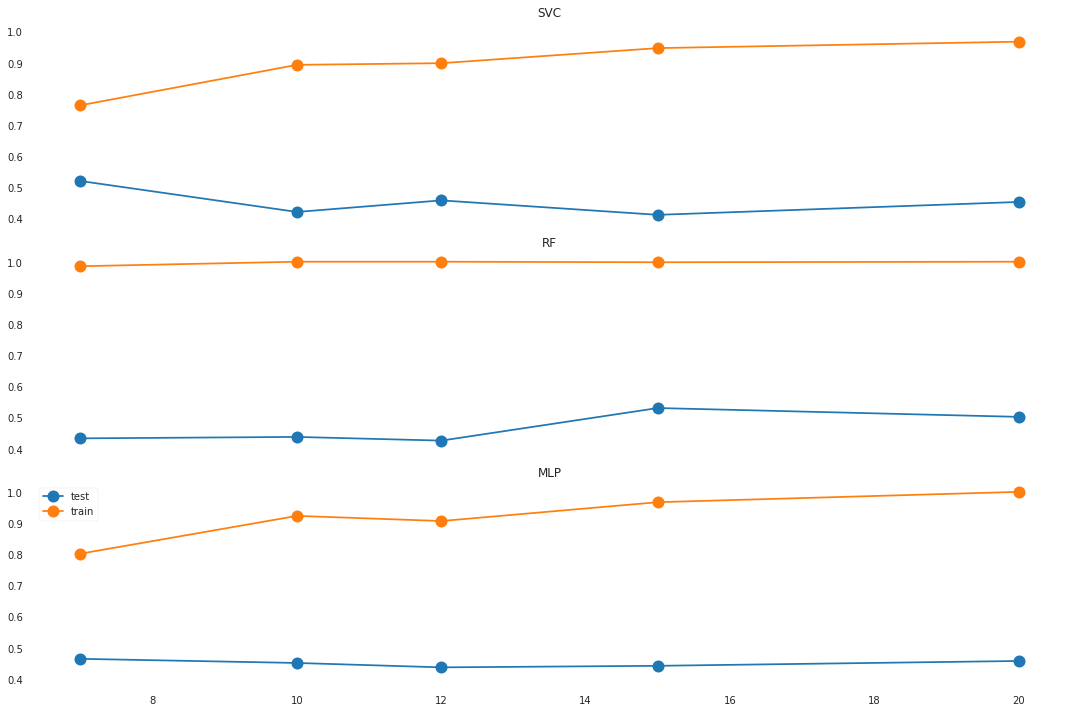

In [42]:
fig, ax = plt.subplots(3,1, figsize = (15,10), sharex = True, sharey = True)
for clf, i in zip(['SVC', 'RF', 'MLP'], range(3)):
    ax[i].set_title(clf)
    ax[i].plot(num_nodes,
             [np.mean([results['NEOFAC_O'][node][k][clf]['test']['balanced_accuracy'] 
               for k in range(1,6)]) for node in num_nodes], marker = 'o', markersize = 12, label= 'test')
    ax[i].plot(num_nodes,
             [np.mean([results['NEOFAC_O'][node][k][clf]['train']['balanced_accuracy'] 
               for k in range(1,6)]) for node in num_nodes], marker = 'o', markersize = 12, label = 'train')
plt.legend()
plt.tight_layout()